<a href="https://colab.research.google.com/github/zinakhazaee/MachineLearning-SupervisedLearning_Regression/blob/main/usa_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [133]:
df = pd.read_csv('/content/drive/MyDrive/datasets_sample/usa-real-estate-datase/realtor-data.zip.csv')

In [3]:
df.shape

(1004966, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004966 entries, 0 to 1004965
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1004966 non-null  object 
 1   bed             864435 non-null   float64
 2   bath            882116 non-null   float64
 3   acre_lot        709920 non-null   float64
 4   city            1004891 non-null  object 
 5   state           1004966 non-null  object 
 6   zip_code        1004761 non-null  float64
 7   house_size      681682 non-null   float64
 8   prev_sold_date  505867 non-null   object 
 9   price           1004895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 76.7+ MB


In [5]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [6]:
df.isna().sum()

status                 0
bed               140531
bath              122850
acre_lot          295046
city                  75
state                  0
zip_code             205
house_size        323284
prev_sold_date    499099
price                 71
dtype: int64

In [7]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [8]:
print('status:','\n', df.status.value_counts(),
      '\n','bed values:','\n', df.bed.value_counts(),
      '\n','bath values:','\n', df.bath.value_counts(),
      '\n','state values:', '\n' ,df.state.value_counts(),
      '\n','city values:', '\n' ,df.city.value_counts())

status: 
 for_sale          1003152
ready_to_build       1814
Name: status, dtype: int64 
 bed values: 
 3.0      267108
2.0      186896
4.0      166232
1.0       95250
5.0       67503
6.0       41023
7.0       14103
8.0       11302
9.0        5910
10.0       2999
12.0       2031
11.0       1493
13.0        378
15.0        335
14.0        330
20.0        261
18.0        244
16.0        188
24.0        165
19.0        125
22.0        110
17.0         96
28.0         54
21.0         40
46.0         36
42.0         30
60.0         27
99.0         23
32.0         21
86.0         21
31.0         20
27.0         13
123.0        12
33.0         11
49.0          8
30.0          8
29.0          7
68.0          6
25.0          4
23.0          3
40.0          3
36.0          3
47.0          3
Name: bed, dtype: int64 
 bath values: 
 2.0      303305
1.0      221660
3.0      209379
4.0       80134
5.0       31834
6.0       15930
7.0        7451
8.0        4889
9.0        2785
10.0       1740
12.0  

In [9]:
df['house_size'].value_counts()

1200.0     5230
800.0      4852
1000.0     4668
1100.0     4354
750.0      4170
           ... 
11033.0       1
5775.0        1
9821.0        1
10440.0       1
5046.0        1
Name: house_size, Length: 6456, dtype: int64

In [77]:
df.duplicated().sum()

890754

In [80]:
df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1003128,for_sale,1.0,1.0,NaN,Great Neck,New York,11023.0,900.0,NaN,400000.0
1003141,for_sale,4.0,4.0,0.25,Great Neck,New York,11023.0,2584.0,2010-06-21,2380000.0
1003572,for_sale,6.0,6.0,1.29,Manhasset,New York,11030.0,NaN,2005-05-05,5050000.0
1003754,for_sale,5.0,3.0,0.55,Manhasset,New York,11030.0,3215.0,1999-07-08,2599000.0


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,864430.0,3.338401,2.082667e+00,1.0,2.00,3.00,4.00,123.0
bath,882111.0,2.513056,1.970701e+00,1.0,1.00,2.00,3.00,198.0
acre_lot,709920.0,15.989320,9.231736e+02,0.0,0.11,0.29,1.16,100000.0
zip_code,1004756.0,6852.197030,3.798490e+03,601.0,3261.00,7052.00,10021.00,99999.0
house_size,681677.0,2167.791058,3.031561e+03,100.0,1127.00,1662.00,2512.00,1450112.0
price,1004890.0,882308.088477,1.912285e+06,0.0,269900.00,479950.00,845000.00,169000000.0


<Axes: xlabel='price'>

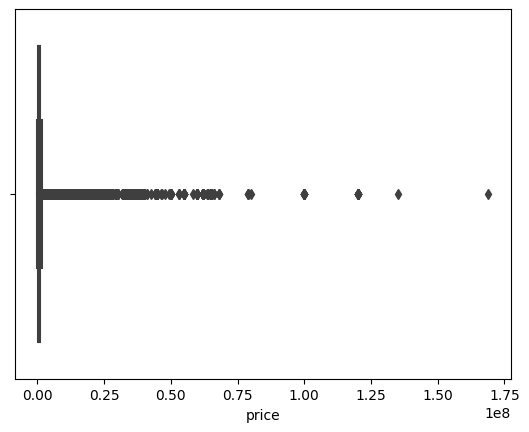

In [82]:
sns.boxplot(data = df , x='price')

In [134]:
df.drop(df[df['price'] >= 500000 ].index , axis=0 , inplace= True)

<Axes: xlabel='price', ylabel='Count'>

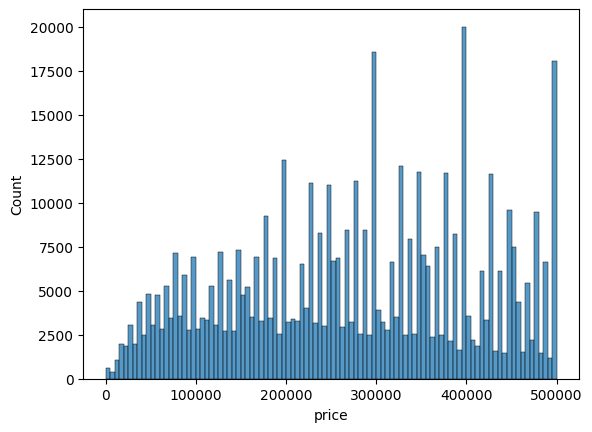

In [86]:
sns.histplot(df['price'] , bins= 100 )

<Axes: xlabel='house_size'>

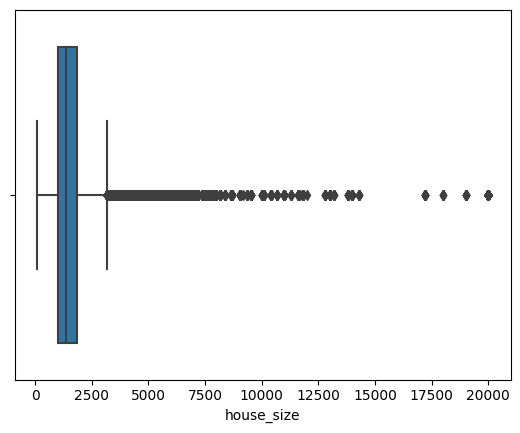

In [114]:
sns.boxplot(data = df , x='house_size')

<Axes: xlabel='bed'>

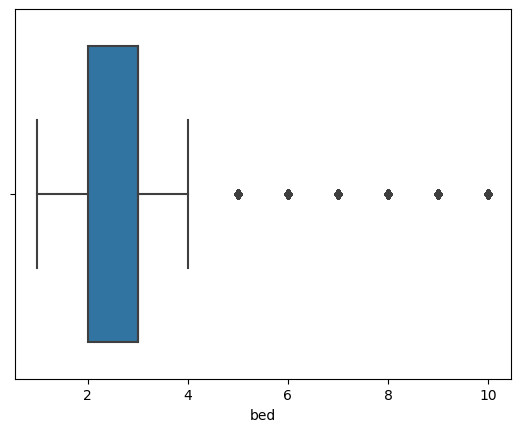

In [113]:
sns.boxplot(data = df , x='bed')


In [135]:
df.drop(df[(df['house_size']> 7500 )| (df['bed']>10)].index , axis= 0 , inplace=True)

In [136]:
df.shape

(528137, 10)

<Axes: xlabel='price'>

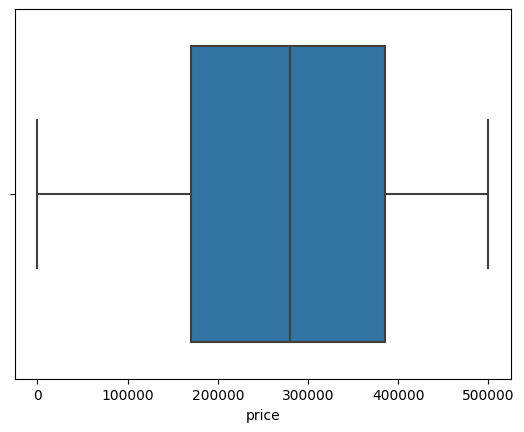

In [137]:
sns.boxplot(data = df , x='price')

<Axes: xlabel='house_size'>

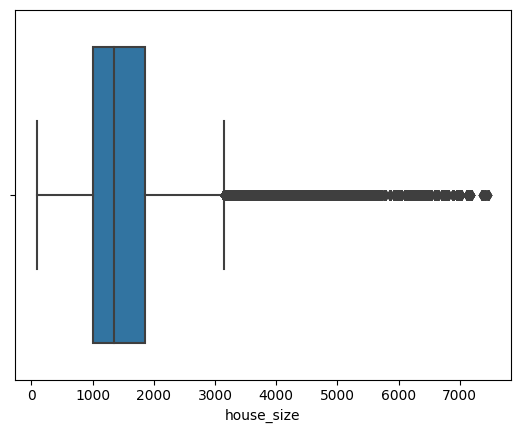

In [138]:
sns.boxplot(data = df , x='house_size')

In [139]:
df.drop(columns= ['status','acre_lot', 'zip_code','prev_sold_date'] , inplace=True)

In [118]:
df.isna().sum()

bed           110395
bath          100712
city              56
state              0
house_size    184995
price             71
dtype: int64

<Axes: xlabel='bed'>

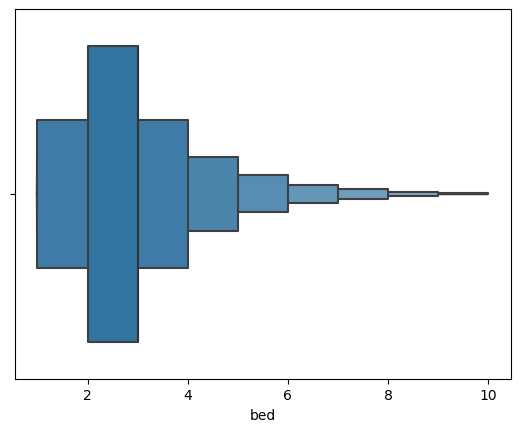

In [140]:
sns.boxenplot(data = df , x= 'bed')

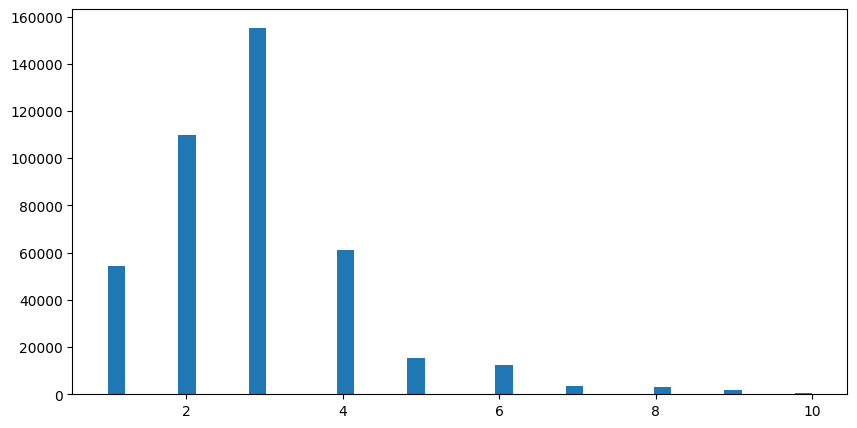

In [141]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= df['bed'], bins=40)
plt.show()

In [142]:
df['bed'].value_counts()

3.0     155365
2.0     109999
4.0      61333
1.0      54349
5.0      15281
6.0      12220
7.0       3672
8.0       3049
9.0       1871
10.0       694
Name: bed, dtype: int64

<Axes: xlabel='house_size'>

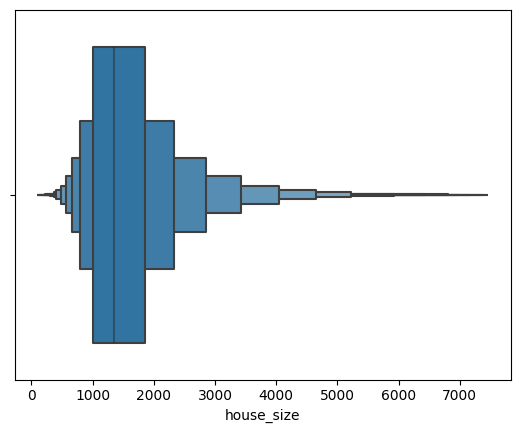

In [143]:
sns.boxenplot(data = df , x= 'house_size')

In [144]:
df['house_size'].max()

7465.0

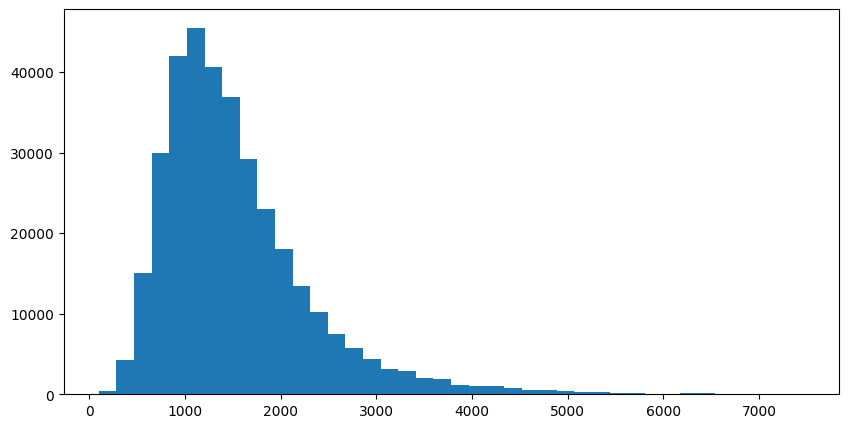

In [145]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= df['house_size'], bins=40)
plt.show()

In [146]:
df['house_size'].value_counts()

1200.0    3882
800.0     3818
750.0     3275
1000.0    3128
1100.0    3113
          ... 
532.0        1
5159.0       1
4843.0       1
4429.0       1
5400.0       1
Name: house_size, Length: 3655, dtype: int64

In [147]:
df.shape

(528137, 6)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528137 entries, 0 to 1004965
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bed         417833 non-null  float64
 1   bath        427516 non-null  float64
 2   city        528081 non-null  object 
 3   state       528137 non-null  object 
 4   house_size  343142 non-null  float64
 5   price       528066 non-null  float64
dtypes: float64(4), object(2)
memory usage: 28.2+ MB


In [149]:
df.isna().sum()

bed           110304
bath          100621
city              56
state              0
house_size    184995
price             71
dtype: int64

In [150]:
df.head()

,bed,bath,city,state,house_size,price
0,3.0,2.0,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,Ponce,Puerto Rico,1800.0,145000.0
4,6.0,2.0,Mayaguez,Puerto Rico,NaN,65000.0


In [154]:
df['bath'].mode()

0    2.0
Name: bath, dtype: float64

In [155]:
df['city'].mode()

0    Bronx
Name: city, dtype: object

In [159]:
df['house_size'].mode()

0    1200.0
Name: house_size, dtype: float64

In [161]:
df['bath'] = df['bath'].fillna(2)

In [162]:
df['house_size'] = df['house_size'].fillna(1200)

In [157]:
df['city'] = df['city'].fillna('Bronx')

In [166]:
df.dropna(subset=['price'] , inplace=True)

In [167]:
df.isna().sum()

bed           110304
bath               0
city               0
state              0
house_size         0
price              0
dtype: int64

In [168]:
dummy = pd.get_dummies(df['city'],drop_first=True)

In [169]:
dummy2 = pd.get_dummies(df['state'],drop_first=True)

In [170]:
df_df = df.drop(columns=['city','state'],axis=1)

In [171]:
final_df = pd.concat([df_df,dummy , dummy2],axis=1)

In [172]:
final_df.head()

,bed,bath,house_size,price,Aberdeen,Abington,Absecon,Absecon Highlands,Accord,Acton,...,New York,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,Tennessee,Vermont,Virgin Islands,Virginia,West Virginia
0,3.0,2.0,920.0,105000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,4.0,2.0,1527.0,80000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2.0,1.0,748.0,67000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.0,2.0,1800.0,145000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,6.0,2.0,1200.0,65000.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [173]:
x = final_df.drop('price' , axis=1)
y = final_df.price

In [174]:
x.shape

(528066, 2363)

In [175]:
y.shape

(528066,)

In [176]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale = MinMaxScaler()
X = scale.fit_transform(x)

In [62]:
from sklearn.model_selection import train_test_split

In [69]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
reg = LinearRegression()

In [72]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
reg.score(xtest,ytest)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_